<h2>CS 3780/5780 Creative Project: </h2>
<h3>Emotion Classification of Natural Language</h3>

Names and NetIDs for your group members: Jessica Andrews (jaa375) and Aileen Huang (aeh245)

Kaggle Team Name: Jess and Aileen

<h3>Introduction:</h3>

<p> The creative project is about conducting a real-world machine learning project on your own, with everything that is involved. Unlike in the programming projects 1-5, where we gave you all the scaffolding and you just filled in the blanks, you now start from scratch. The past programming projects provide templates for how to do this (and you can reuse part of your code if you wish), and the lectures provide some of the methods you can use. So, this creative project brings realism to how you will use machine learning in the real world.  </p>

The task you will work on is classifying texts to human emotions. Through words, humans express feelings, articulate thoughts, and communicate our deepest needs and desires. Language helps us interpret the nuances of joy, sadness, anger, and love, allowing us to connect with others on a deeper level. Are you able to train an ML model that recognizes the human emotions expressed in a piece of text? <b>Please read the project description PDF file carefully and follow the instructions there. Also make sure you write your code and answers to all the questions in this Jupyter Notebook </b> </p>
<p>


<h2>Part 0: Basics</h2><p>

<h3>0.1 Import:</h3><p>
Please import necessary packages to use. Note that learning and using packages are recommended but not required for this project. Some official tutorial for suggested packacges includes:
    
https://scikit-learn.org/stable/tutorial/basic/tutorial.html
    
https://pytorch.org/tutorials/
    
https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html
<p>

In [2]:
import os
import pandas as pd
import numpy as np
import re
import torch

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
import nltk
from nltk.corpus import stopwords

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV



<h3>0.2 Accuracy and Mean Squared Error:</h3><p>
To measure your performance in the Kaggle Competition, we are using accuracy. As a recap, accuracy is the percent of labels you predict correctly. To measure this, you can use library functions from sklearn. A simple example is shown below.
<p>

In [3]:
from sklearn.metrics import accuracy_score
y_pred = [3, 2, 1, 0, 1, 2, 3]
y_true = [0, 1, 2, 3, 1, 2, 3]
accuracy_score(y_true, y_pred)

0.42857142857142855

<h2>Part 1: Basic</h2><p>
Note that your code should be commented well and in part 1.4 you can refer to your comments.

<h3>1.1 Load and preprocess the dataset:</h3><p>
We provide how to load the data on Kaggle's Notebook.
<p>

In [4]:
train = pd.read_csv("train.csv")
train_text = train["text"]
train_label = train["label"]

test = pd.read_csv("test.csv")
test_id = test["id"]
test_text = test["text"]

In [5]:
# Make sure you comment your code clearly and you may refer to these comments in the part 1.4

# 3. Define a text preprocessing function
def preprocess_text(text):
    """
    Cleans and preprocesses the input text.
    """
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)  # Remove URLs
    return text

train_text = train["text"].apply(preprocess_text)
test_text = test["text"].apply(preprocess_text)
train_label = train["label"]

# 5. Encode labels
label_encoder = LabelEncoder()
train_label_encoded = label_encoder.fit_transform(train_label)

# 6. Split the training data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    train_text, train_label_encoded, test_size=0.2, random_state=42
)

# 7. TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(
    max_features=20000,  # Use top 20,000 features for richer representation
    ngram_range=(1, 3),  # Include unigrams, bigrams, and trigrams
    stop_words="english",  # Remove common stop words
    min_df=5,  # Ignore terms appearing in fewer than 5 documents
    max_df=0.8,  # Ignore terms appearing in more than 80% of documents
)

# Fit and transform the train data, transform validation and test data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_val_tfidf = tfidf_vectorizer.transform(X_val)
X_test_tfidf = tfidf_vectorizer.transform(test_text)

# 8. Display preprocessing summary
print("Preprocessing Complete!")
print(f"Train TF-IDF shape: {X_train_tfidf.shape}")
print(f"Validation TF-IDF shape: {X_val_tfidf.shape}")
print(f"Test TF-IDF shape: {X_test_tfidf.shape}")

# 9. Display sample features from the TF-IDF vectorizer
feature_names = tfidf_vectorizer.get_feature_names_out()
print(f"Number of features: {len(feature_names)}")
print("Sample Feature Names:")
print(feature_names[:30])  # Display the first 30 feature names

# Save the processed datasets if needed
X_train.to_csv("X_train_cleaned.csv", index=False)
X_val.to_csv("X_val_cleaned.csv", index=False)
test_text.to_csv("test_cleaned.csv", index=False)


Preprocessing Complete!
Train TF-IDF shape: (8000, 2572)
Validation TF-IDF shape: (2000, 2572)
Test TF-IDF shape: (15000, 2572)
Number of features: 2572
Sample Feature Names:
['20' '30' 'ability' 'able' 'absolute' 'absolutely' 'abuse' 'abused'
 'accept' 'acceptable' 'accepted' 'accident' 'accidentally'
 'accomplishment' 'account' 'accounts' 'ache' 'aching' 'act' 'acting'
 'active' 'activities' 'actor' 'actual' 'actually' 'actually feel' 'add'
 'admired' 'admit' 'admit feeling']


<h3>1.2 Use At Least Two Training Algorithms from class:</h3><p>
You need to use at least two training algorithms from class. You can use your code from previous projects or any packages you imported in part 0.1.

In [6]:
# Make sure you comment your code clearly and you may refer to these comments in the part 1.4

#Model 1: Logistic Regression

#Logistic Regression Model: Just showing its original training accuracy

#Train Logistic Regression model
logreg = LogisticRegression(max_iter=1000, random_state=42)  # Increase max_iter if needed
logreg.fit(X_train_tfidf, y_train)

# 3. Make predictions
y_train_pred = logreg.predict(X_train_tfidf)
y_val_pred = logreg.predict(X_val_tfidf)

# 4. Evaluate the model
train_accuracy = accuracy_score(y_train, y_train_pred)
val_accuracy = accuracy_score(y_val, y_val_pred)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")

Training Accuracy: 0.7891
Validation Accuracy: 0.6805


In [7]:
#Model 2: SVM

#SVM Grid Search
# svm_params = {
#     'kernel': ['rbf'],
#     'C': np.arange(1,8)
# }

# grid = GridSearchCV(estimator = SVC(), param_grid = svm_params, scoring= 'accuracy')
# grid.fit(X_train_tfidf, y_train)

# print(f"\nBest Parameters: {grid_search.best_params_}")
# print(f"Best Cross-Validation Accuracy: {grid_search.best_score_:.4f}")

#Model 2: SVM
svm = SVC(kernel = 'rbf', C= 2.0, gamma= 'scale')
svm.fit(X_train_tfidf, y_train)
#SVM Testing

# 3. Make predictions
y_val_pred = svm.predict(X_val_tfidf)

# 4. Evaluate the model
val_accuracy = accuracy_score(y_val, y_val_pred)

print(f"Validation Accuracy: {val_accuracy:.4f}")

Validation Accuracy: 0.6850


<h3>1.3 Training, Validation and Model Selection:</h3><p>
You need to split your data to a training set and validation set or performing a cross-validation for model selection.

In [8]:
#LOGISTIC REGRESSION:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

#Want to use Entire Training Set for K-fold cross validation!! This line restores the entire training set
X_train, y_train = train_text, train_label_encoded
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(test_text)
print(f"Train TF-IDF shape: {X_train_tfidf.shape}")
print(f"Test TF-IDF shape: {X_test_tfidf.shape}")

# Define the hyperparameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strengths
    'solver': ['liblinear', 'saga'],  # Solvers compatible with the penalties
}

# Set up StratifiedKFold for cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define Logistic Regression model
logreg = LogisticRegression(random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=logreg,
    param_grid=param_grid,
    scoring='accuracy',
    cv=cv,  # Use StratifiedKFold
    n_jobs=-1,  # Use all available cores
    verbose=2   # Show detailed output
)

# Fit GridSearchCV to the training data
grid_search.fit(X_train_tfidf, y_train)

# Output the best parameters and accuracy
print(f"\nBest Parameters: {grid_search.best_params_}")
print(f"Best Cross-Validation Accuracy: {grid_search.best_score_:.4f}")

# Predict on the test set

# Evaluate the best model on the training set
best_model = grid_search.best_estimator_
y_train_pred = best_model.predict(X_train_tfidf)
train_accuracy = accuracy_score(train_label_encoded, y_train_pred)
print(f"Training Accuracy with Best Model: {train_accuracy:.4f}")

# Use the best model to make predictions
test_predictions = best_model.predict(X_test_tfidf)

# Save predictions to a CSV file
output = pd.DataFrame({"id": test_id, "label": test_predictions})
output.to_csv("submission_logreg.csv", index=False)
print("Predictions saved to submission_logreg.csv")


Train TF-IDF shape: (10000, 3087)
Test TF-IDF shape: (15000, 3087)
Fitting 5 folds for each of 10 candidates, totalling 50 fits


/Users/aileenh/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/Users/aileenh/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/aileenh/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/aileenh/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/aileenh/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/aileenh/opt/anaco


Best Parameters: {'C': 10, 'solver': 'liblinear'}
Best Cross-Validation Accuracy: 0.7156
Training Accuracy with Best Model: 0.9438
Predictions saved to submission_logreg.csv


<h3>1.4 Explanation in Words:</h3><p>
    You need to answer the following questions in the markdown cell after this cell:

1.4.1 How did you formulate the learning problem?

1.4.2 Which two learning methods from class did you choose and why did you made the choices?

1.4.3 How did you do the model selection?

1.4.4 Does the test performance reach the first baseline "Tiny Piney"? (Please include a screenshot of Kaggle Submission)

Responses to 1.4

1.4.1 How did you formulate the learning problem?

We formulated the problem as a multi-class text classification task, where the goal is to predict one of 28 emotion classes (labeled 0 to 27) based on natural language text input. The training data consisted of labeled text samples, while the test data contained unlabeled samples requiring predictions.

The problem was addressed using supervised learning.

For preprocessing, we converted all words to lowercase and removed punctuation and potential urls. Converting all text to lowercase standardizes the data, helping reduce the feature space by treating variations of the same word equally. Removing punctuation and URLs simplifies the text, eliminating characters and elements that may not contribute to the semantic meaning. These steps ensure that the model focuses on essential textual elements—words and their contexts—thereby facilitating cleaner, more effective training.

For feature extraction, we used the TF-IDF vectorizer to transform text into numerical representations. This technique measures the importance of a word in a document in relation to a collection of documents, thereby enabling us to convert text data into a format that is suitable for machine learning algorithms. TF-IDF helps in distinguishing the relevance of words in large texts, enhancing the model's ability to focus on more significant words for classification.

For label encoding, the emotional labels were numerically encoded to facilitate processing by machine learning models. This encoding converts categorical labels into a numerical format that models can interpret and work with during training and predictions.

By framing the task within a supervised learning context, we prepared a structured approach to train models on labeled data, enabling them to learn the relationship between the textual features and their corresponding emotional classes. This formulation is good for guiding the subsequent steps of model selection, training, and evaluation.

1.4.2 Which two learning methods from class did you choose and why did you made the choices?

We chose logistic regression model and SVM model.

Logistic Regression Reasoning:
We selected Logistic Regression as our learning method because it is an interpretable and efficient algorithm that is well-suited for multi-classification problem. Logistic Regression models the probability of class membership using a linear decision boundary, which works effectively in high-dimensional spaces. This makes it an ideal choice for text data, where the TF-IDF representation often results in a very large feature space.

Logistic Regression was chosen because it is straightforward to implement and interpret, making it a good baseline for evaluating more complex models. Additionally, its ability to handle high-dimensional feature spaces makes it highly effective for text classification tasks with large vocabularies. By leveraging Logistic Regression, we could establish a solid foundation for tackling the problem while keeping the model relatively simple and computationally efficient. This choice aligns with the learning methods covered in class, reinforcing the foundational concepts of supervised learning.

SVM Reasoning:
We chose the SVM model because we wanted to try a model that would be effective for modeling data that is not linearly separable. The SVM model allows you to represent the decision boundary through the use of kernels. By using kernels, SVM can efficiently handle complex relationships between features and learn from non-linear patterns, which is useful for text classification tasks where the relationships between words and classes are complex and less straightforward. Additionally, SVM works well in high-dimensional spaces, which is effective when dealing with text data which typically has a large feature space.Its ability to maximize the margin between classes helps improve generalization, making it less likely to overfit compared to other models. Additionally, SVM performs well on multi-class classification tasks which aligns well with the needs of our text classification problem.



1.4.3 How did you do the model selection?

To determine the best model for our text classification task, we evaluated both Logistic Regression and Support Vector Machines (SVM) using accuracy score as the performance metric. While the validation accuracy for both models was similar, we ultimately chose Logistic Regression due to its practical advantages in efficiency, scalability, and interpretability, which made it a more suitable choice for our specific task.

Logistic Regression is computationally faster to train than SVM, especially for datasets with a large number of samples and features, such as our TF-IDF-transformed text data. This efficiency is important when working with high-dimensional feature spaces, as Logistic Regression solves a simpler optimization problem compared to SVM, which requires computing support vectors and kernel transformations (if used). For large-scale tasks like this, Logistic Regression provides a more practical solution with similar performance.

Another key factor is scalability. Logistic Regression can handle high-dimensional datasets effectively without requiring additional complexity, such as kernel functions often needed in SVM to handle non-linear decision boundaries. Additionally, Logistic Regression provides probabilistic outputs, which indicate the likelihood of a sample belonging to each class. This is particularly valuable for multi-class classification, as it offers more nuanced predictions and insight into model confidence. SVM, on the other hand, does not natively produce probabilities and requires additional computation to do so.

Finally, Logistic Regression’s interpretability gave it an edge over SVM. The coefficients of the Logistic Regression model correspond directly to the importance of features (e.g., specific words or n-grams) in making classification decisions. This transparency allows us to understand how the model arrives at its predictions and provides actionable insights into the relationships between text features and emotion classes. SVM’s decision boundary is less interpretable, as it depends on the support vectors and kernel transformations.

Because of these reasons, we chose Logistic Regression over SVM despite their similar validation performance. Its combination of computational efficiency, scalability, probabilistic outputs, and interpretability made it the more practical and stronger choice for this task.


1.4.4 Does the test performance reach the first baseline "Tiny Piney"? (Please include a screenshot of Kaggle Submission)

Our Kaggle Team Name is Jess and Aileen. We beat "Tiny Piney".

Logistic Regression Screenshot:  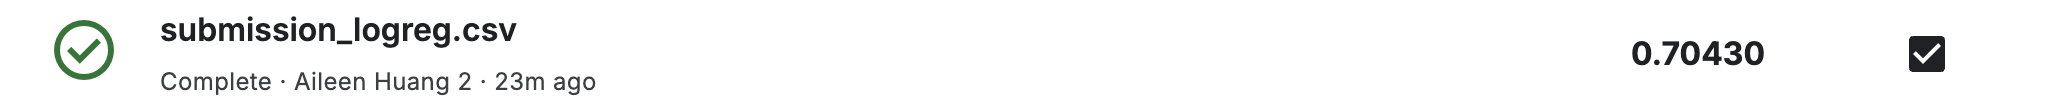

<h2>Part 2: Be creative!</h2><p>

<h3>2.1 Open-ended Code:</h3><p>
You may follow the steps in part 1 again but making innovative changes like using new training algorithms, etc. Make sure you explain everything clearly in part 2.2. Note that beating "Zero Hero" is only a small portion of this part. Any creative ideas will receive most points as long as they are reasonable and clearly explained.

In [9]:
#METHOD: BERT Transformer - NOTE RUN ON JUPYTER NOTEBOOK!!!

In [10]:
pip install transformers



[notice] A new release of pip available: 22.2.2 -> 24.3.1
[notice] To update, run: /Users/aileenh/opt/anaconda3/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [11]:
pip install transformers[torch]


[notice] A new release of pip available: 22.2.2 -> 24.3.1
[notice] To update, run: /Users/aileenh/opt/anaconda3/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [12]:
pip install accelerate==0.26.0



[notice] A new release of pip available: 22.2.2 -> 24.3.1
[notice] To update, run: /Users/aileenh/opt/anaconda3/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [13]:
pip install 'transformers[torch]'



[notice] A new release of pip available: 22.2.2 -> 24.3.1
[notice] To update, run: /Users/aileenh/opt/anaconda3/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [14]:
import torch
from torch.utils.data import DataLoader, Dataset
from transformers import DistilBertTokenizerFast, DistilBertForSequenceClassification, Trainer, TrainingArguments
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the dataset
data = pd.read_csv('train.csv')
train_texts, val_texts, train_labels, val_labels = train_test_split(data['text'], data['label'], test_size=0.1)

# Tokenization
tokenizer = DistilBertTokenizerFast.from_pretrained('distilbert-base-uncased')
train_encodings = tokenizer(train_texts.tolist(), truncation=True, padding=True, max_length=128)
val_encodings = tokenizer(val_texts.tolist(), truncation=True, padding=True, max_length=128)

# Dataset class
class EmotionDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

train_dataset = EmotionDataset(train_encodings, train_labels.tolist())
val_dataset = EmotionDataset(val_encodings, val_labels.tolist())

# Model initialization
model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=28)

# Training arguments
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=3,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=64,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10,
)

# Define metric computation
def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    acc = accuracy_score(labels, preds)
    return {'accuracy': acc}

# Trainer - Built in trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    compute_metrics=compute_metrics
)

# Train the model
trainer.train()

# Evaluate and print accuracy for both training and validation datasets
train_results = trainer.evaluate(train_dataset)
val_results = trainer.evaluate(val_dataset)
print(f"Training Accuracy: {train_results['eval_accuracy']:.4f}")
print(f"Validation Accuracy: {val_results['eval_accuracy']:.4f}")

# Load the test dataset for final predictions
test_data = pd.read_csv('test.csv')
test_texts = test_data['text'].tolist()
test_encodings = tokenizer(test_texts, truncation=True, padding=True, max_length=128)
test_dataset = EmotionDataset(test_encodings, [0]*len(test_texts))  # Dummy labels

# Predict on test data
predictions = trainer.predict(test_dataset)
predicted_labels = predictions.predictions.argmax(-1)

# Saving predictions to CSV for submission
submission = pd.DataFrame({'id': range(len(predicted_labels)), 'label': predicted_labels})
submission.to_csv('submission.csv', index=False)


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Step,Training Loss
10,3.363800
20,3.360900
30,3.341900
40,3.315000
50,3.282100
60,3.197800
70,3.111200
80,2.971200
90,2.893900
100,2.800200


[CV] END ................................C=0.01, solver=saga; total time=   0.8s
[CV] END .................................C=0.1, solver=saga; total time=   0.7s
[CV] END ..............................C=1, solver=liblinear; total time=   0.8s
[CV] END .............................C=10, solver=liblinear; total time=   1.2s
[CV] END ..................................C=10, solver=saga; total time=   3.7s
[CV] END ...........................C=0.01, solver=liblinear; total time=   0.5s
[CV] END ............................C=0.1, solver=liblinear; total time=   0.5s
[CV] END .................................C=0.1, solver=saga; total time=   0.7s
[CV] END ...................................C=1, solver=saga; total time=   0.8s
[CV] END .............................C=10, solver=liblinear; total time=   1.2s
[CV] END ............................C=100, solver=liblinear; total time=   1.8s
[CV] END ............................C=100, solver=liblinear; total time=   1.8s
[CV] END ...................

Training Accuracy: 0.8573
Validation Accuracy: 0.7730


<h3>2.2 Explanation in Words:</h3><p>
You need to answer the following questions in a markdown cell after this cell:

2.2.1 How much did you manage to improve performance on the test set? Did you beat "Zero Hero" in Kaggle? (Please include a screenshot of Kaggle Submission)

2.2.2 Please explain in detail how you achieved this and what you did specifically and why you tried this.

Responses to cell above:  

2.2.1: We did improve performance on the test set by around 0.6% compared to logistic regression, and beat Zero Hero on Kaggle (screenshot below).
    
2.2.2:

Reference to articles that influenced our choice to use DistilledBERT and Trainer.

https://medium.com/@kiddojazz/distilbert-for-multiclass-text-classification-using-transformers-d6374e6678ba

https://www.sunnyville.ai/fine-tuning-distilbert-multi-class-text-classification-using-transformers-and-tensorflow/

To achieve an improvement in performance on the test set using a BERT-based approach, we transitioned from the baseline logistic regression model (our best result), which initially provided us with an accuracy of 70.43%. The primary rationale behind this switch was BERT's ability to understand and leverage the contextual nuances of language, which is essential in emotion classification tasks.

Implementation Details and Strategy:
DistilBERT leverages the full textual context, including punctuation and capitalization, which can convey meaningful signals about sentence boundaries, emotions, or emphases (like exclamation marks for excitement), so unlike our approach for Part 1, we decided to keep punctuation and capitalization. Removing these elements might strip away subtle contextual clues that the model can use to make more informed predictions.

We chose DistilBERT for our model due to its balance between efficiency and effectiveness. DistilBERT is a streamlined version of the more cumbersome BERT model that retains most of the original model's strengths but is more resource-efficient. This choice was ideal given our constraints on training time and computational resources (HuggingFace source).

For tokenization, we employed DistilBertTokenizerFast, which adapts the text for BERT’s requirements, adding necessary special tokens and managing sentence length through padding and truncation. The model was fine-tuned using the Hugging Face’s Trainer API, which simplified the training process and allowed for easy integration of training arguments like the number of epochs, batch size, and learning rate adjustments ((Sunnyville Article)).

Fine-Tuning Process (Sunnyville Article): We utilized the Hugging Face’s Trainer API for fine-tuning DistilBERT, which streamlined the training and evaluation process. The Trainer API is particularly advantageous because it abstracts away much of the boilerplate code associated with training loops (as used in past class projects), allowing us to focus on tuning the model’s performance.

Tokenization (Temidayo Omoniyi - Medium Article): Using DistilBertTokenizerFast, we ensured that our input data was correctly formatted for the model, including the addition of special tokens CLS and SEP, necessary for BERT architectures to function correctly.               

Hyperparameter Adjustments: In our implementation, we carefully fine-tuned several key hyperparameters to optimize the performance of the DistilBERT model for our specific task. We set the number of training epochs to three. This choice was aimed at providing the model with sufficient exposure to the training data while minimizing the risk of overfitting. Overfitting could diminish the model's ability to generalize well to unseen data.

Additionally, we selected an appropriate batch size that balances between efficient memory usage and the granularity of the gradient updates during the training process. A well-chosen batch size ensures that the model updates are smooth and stable, contributing to a more robust learning trajectory.

We also included warm-up steps in our training configuration. These steps are designed to gradually increase the learning rate from a lower starting point at the beginning of training. This approach helps in stabilizing the training process by preventing large, destabilizing updates to the model's pre-trained weights, which can be crucial for leveraging the already learned features while allowing the model to adapt effectively to the nuances of our new data.

Evaluation and Results:
The compute_metrics function was defined to calculate the accuracy of the model, ensuring we could quantitatively measure its performance against our logistic regression baseline. After training, we conducted evaluations on both a training set and a validation set to confirm the model's ability to learn effectively and generalize well beyond the training data.

The final step involved making predictions on the test dataset, which had been similarly preprocessed and tokenized. These predictions were formatted according to Kaggle's submission requirements and uploaded to the platform. Our submission achieved around a 0.6% improvement over our best baseline model, outperforming the "Zero Hero" benchmark on Kaggle. This improvement was a direct result of leveraging BERT's advanced capabilities to interpret the complex and varied semantic structures within the text data.

Screenshot of beating Zero Hero: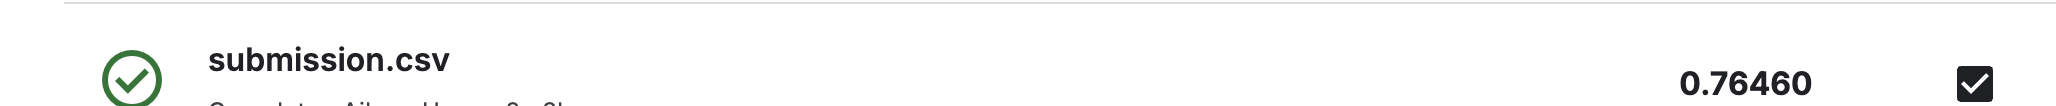

<h2>Part 3: Kaggle Submission</h2><p>
You need to generate a prediction CSV using the following cell from your trained model and submit the direct output of your code to Kaggle. The results should be presented in two columns in csv format: the first column is the data id (0-14999) and the second column includes the predictions for the test set. The first column must be named id and the second column must be named label (otherwise your submission will fail). A sample predication file can be downloaded from Kaggle for each problem.
We provide how to save a csv file if you are running Notebook on Kaggle.

In [17]:
id = range(15000)
prediction = range(15000)
submission = pd.DataFrame({'id': id, 'label': prediction})
submission.to_csv('/kaggle/working/submission.csv', index=False)

In [ ]:
# We created submission csv's in our code above! And have submitted these on Kaggle.

<h2>Part 4: Resources and Literature Used</h2><p>

Please cite the papers and open resources you used.

Part 1: Two Learning Algorithms Learned from Class

Lecture 5 from class on k-fold cross validation,  Lecture 8 on SVM, and Lecture 10 on Regularized Linear Models

Learned TD-IDF Preprocessing from course CS 4300 last spring! https://scikit-learn.org/1.5/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html, https://scikit-learn.org/dev/modules/generated/sklearn.preprocessing.LabelEncoder.html

Sklearn library (Link to GridSearchCV and CrossValidation): https://scikit-learn.org/stable/

https://scikit-learn.org/1.5/modules/generated/sklearn.model_selection.KFold.html

LogReg on Hyperparameters and Multi-classification: https://scikit-learn.org/1.5/modules/generated/sklearn.linear_model.LogisticRegression.html

SVM: https://scikit-learn.org/1.5/modules/generated/sklearn.svm.SVC.html

Part 2:

Lecture 15 on attention and transformers

GenAI citation for create Emotion Dataset for Preprocessing BERT: https://chatgpt.com/share/67563f8b-813c-8012-ad17-27277bbf06c9

Info on DistilBERT:

https://huggingface.co/docs/transformers/en/model_doc/distilbert


https://medium.com/@kiddojazz/distilbert-for-multiclass-text-classification-using-transformers-d6374e6678ba

https://www.sunnyville.ai/fine-tuning-distilbert-multi-class-text-classification-using-transformers-and-tensorflow/
